### Import Libraries

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
import quantecon as qe
from _model_individual import FireProblem

### Plotting Preferences

In [2]:
from matplotlib import cm
%matplotlib inline

### Solve for the Value Function

In [3]:
fp = FireProblem(w=40)
v_init = np.array([np.ones((fp.n, 1, fp.t.size))*i for i in range(fp.y.size)]).reshape(fp.n,fp.y.size,fp.t.size)
#v_init = np.ones((fp.n, fp.y.size, fp.t.size))*10
v = qe.compute_fixed_point(fp.bellman_operator, v_init, error_tol=1e-3, print_skip=10, max_iter=1000)

Iteration    Distance       Elapsed (seconds)
---------------------------------------------
10           1.756e+00      4.064e+02         
20           9.992e-01      7.023e+02         
30           5.868e-01      9.903e+02         
40           3.491e-01      1.294e+03         
50           2.093e-01      1.591e+03         
60           1.262e-01      1.898e+03         
70           7.641e-02      2.194e+03         
80           4.649e-02      2.514e+03         
90           2.839e-02      2.801e+03         
100          1.741e-02      2.870e+03         
110          1.071e-02      2.938e+03         
120          6.611e-03      3.006e+03         
130          4.093e-03      3.074e+03         
140          2.540e-03      3.142e+03         
150          1.580e-03      3.210e+03         
160          9.854e-04      3.278e+03         


### Solve for the Optimal Policy

In [4]:
optimal_policy = fp.get_greedy(v)

### Plot the Value Function

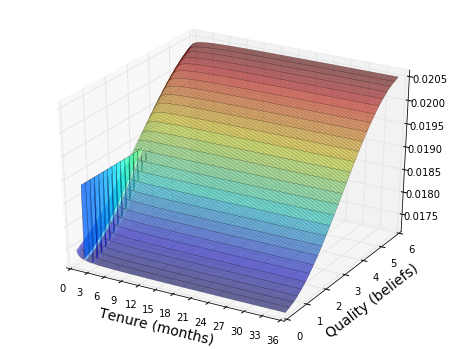

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
tg, yg = np.meshgrid(fp.t, fp.y)
ax.plot_surface(tg,
                yg,
                v[0,:,:], #for worker 0
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.5,
                linewidth=0.25)

ax.set_zlim(np.amin(v[0,:,:]), np.amax(v[0,:,:]))
ax.set_xlabel('Tenure (months)', fontsize=14)
ax.set_ylabel('Quality (beliefs)', fontsize=14)

ax.set_xlim(0,fp.T_max)
labels = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36]
plt.xticks(np.linspace(0, fp.T_max+1, (fp.T_max+1)/30+1), labels)
plt.show()

### Plot the Optimal Policy

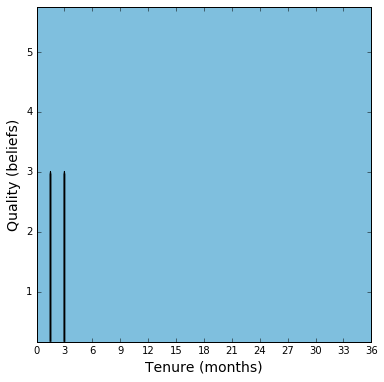

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
tg, yg = np.meshgrid(fp.t, fp.y)

lvls=(-0.5, 0.5)
ax.contourf(tg, yg, optimal_policy[0,:,:], levels=lvls, cmap=cm.winter, alpha=0.5) #for worker 0
ax.contour(tg, yg, optimal_policy[0,:,:], colors='k', levels=lvls, linewidths=1) #for worker 0

ax.set_xlabel('Tenure (months)', fontsize=14)
ax.set_ylabel('Quality (beliefs)', fontsize=14)

ax.set_xlim(0,fp.T_max)
labels = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36]
plt.xticks(np.linspace(0, fp.T_max+1, (fp.T_max+1)/30+1), labels)
plt.show()